# Lab 3 CRISP-DM Capstone: Cluster analysis of Diabetes Dataset

MSDS 7331 - Section 403  <br>
Team Members: Andrew Walch | Rob Rivens | Sabitri KC

## Business Understanding

We chose to analyze a data set called "Diabetes 130-US Hospitals", which contains data collected on Diabetes patients for years 1999-2008. The data was prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes or we will investigate the impact of various clinical practices is readmission rates.  We felt this would be an interesting Classification problem, as we have prior knowledge that Diabetes affects some people of certain racial ethnicities more than others.  We also thought looking at factors related to readmission could be related to other factors such as other illnesses, number of medications being taken or age.  
our goal is to pre-process, analyse, visualise,use some dimensionality techniques and use some clustering algorithm.. The final outcome is a classifier that is able to predict a patient's readmission.For this clustering exercise,we will developed 2 models:

-  K-mean clustering: K-means is an iterative algorithm which assigns data points to the nearest centroid and updates the centroids each pass until convergence or predetermined number of iterations is met.sice our data set is very large with many attibutes we will be using PCA dimension reduction first and  do recursive use of K-means clustering to split the dataset into different clusters.


-  Density-based spatial clustering of applications with noise(DB-SCAN): DBSCAN is one of the most common density-based clustering algorithms:given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). 
we will also use t-Distributed Stochastic Neighbor Embedding (t-SNE)technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets like this.

In order to evaluate effectiveness of the clustering algorithms,we will choose from 2 classes of similarity or distance metrics.
The first one will have Euclidean measures namely Euclidean/L2-Norm, Manhattan, and Maximum distances and  Non-Euclidean distances comprising of Cosine, Jaccard, and Edit distances.Euclidean distances are appropriate for data that can be represented in Euclidean space or on a coordinate system (2 or 3 dimensional) whererease Non-Euclidean measures  are appropriate with  the data that will not fit in Euclidean space.
Regardless of which class of distance measure is used, distances close to 1 are dissimilar data while distances closer to 0 are similar data. We want a metric which maximizes the distance between samples in different clusters, and minimizes distance within each cluster.
Our clustering models utilized the patients data from 130 US hospital between 1998 and 2008 and  was built out of records for which some form of diabetes was entered as a diagnosis.Our goal was to derive insight into patients data and to analyze factors related to readmission.


## Data Understanding

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

- It is an inpatient encounter (a hospital admission)
- 	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
- 	The length of stay was at least 1 day and at most 14 days.
- 	Laboratory tests were performed during the encounter.
- 	Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.




## Data Structure

There are total 55 attributes and 101,766 observations in this datasets.The table below describes the variable name, its category, its description, and the type of variable (Continuous or Categorical.)The variables are broken into 4 categories: Patient Data,Admission/Hospital Stay Data, Financial Data and Medical Procedure/Drug Data, and Readmission Data as shown in tavle below.

In [91]:
import pandas as pd
from IPython.display import display, HTML

In [92]:
variables_desc = pd.read_csv('dataset_diabetes/variable_desc.csv',delimiter='\t')
variables = variables_desc.sort_index()

In [93]:
tableStyle ="""<style> #vtTable { font-family: "Trebuchet MS", Arial, Helvetica, sans-serif; border-collapse: collapse;}
    #vtTable td, #vtTable th {border: 1px solid #ddd;padding: 8px;text-align:left;}
    #vtTable tr:nth-child(even){background-color: #f2f2f2;}
    #vtTable tr:hover {background-color: #ddd;}
    #vtTable th {padding-top: 12px;padding-bottom: 12px;text-align:left;}</style>
    """
tableHeader = '<table id = "vtTable"><tr><th>Feature Name</th><th>Variable Category</th><th>Description and values</th><th>Variable Type</th><th>%Missing</th></tr>'
tableFooter = '</table>'
for row in variables.itertuples(index=True, name ='Pandas'):
    tableRow = '<tr><td>'+row[1]+'</td><td>'+row[2]+'</td><td>'+row[3]+'</td><td>'+row[4]+'</td><td>'+row[5]+'</td></tr>'
    tableHeader += tableRow


variable_table = tableStyle + tableHeader + tableFooter
display(HTML(variable_table))

Feature Name,Variable Category,Description and values,Variable Type,%Missing
Encounter ID,Patient Data,Unique identifier of an encounter,Numeric,0%
Patient Number,Patient Data,Unique identifier of a patient,Numeric,0%
Race,Patient Data,"Values: Caucasian, Asian, African American, Hispanic, and other",Nominal,2%
Gender,Patient Data,"Values: male, female, and unknown/invalid",Nominal,0%
Age,Patient Data,"Grouped in 10-year intervals: [0, 10),[ 10, 20), …, [90, 100)",Nominal,0%
Weight,Patient Data,Weight in pounds,Numeric,97%
Admission type,Admission/Hospital Stay Data,"Integer identifier corresponding to 9 distinct values, for example,emergency, urgent, elective, newborn, and not available",Nominal,0%
Discharge disposition,Admission/Hospital Stay Data,"Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available",Nominal,0%
Admission source,Admission/Hospital Stay Data,"Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital",Nominal,0%
Time in hospital,Admission/Hospital Stay Data,Integer number of days between admission and discharge,Numeric,0%


### Import libraries

In [94]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
rng = np.random.RandomState(1)

### Import of Dataset

In [95]:
Dataset = {}
Dataset['first'] = pd.read_csv("dataset_diabetes\diabetic_data.csv", index_col='encounter_id', na_values="?", low_memory=False)


In [96]:

Dataset['first'].head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,...,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,...,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,...,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,...,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,...,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,...,No,No,No,No,Ch,Yes,NO


In [97]:
Dataset['first'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 2278392 to 443867222
Data columns (total 49 columns):
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      1

### verify the data quality,imputed missing values and remove the outliers by classifiying them according to a specified distance from the first and third quartiles before visualization and clustering: 

In [98]:
# Get an idea of how many features are missing values, and how many values they're missing:
def percent_null(data):
    # Returns a Pandas series of what percentage of each feature of 'data' contains NaN values
    pc_null = data.apply(pd.Series.isnull).apply(lambda x: 100*round(len(x[x==True])/len(x), 4))
    return pc_null[pc_null!=0]
percent_null(Dataset['first'])

race                  2.23
weight               96.86
payer_code           39.56
medical_specialty    49.08
diag_1                0.02
diag_2                0.35
diag_3                1.40
dtype: float64

The original database contains incomplete, redundant, and noisy information as expected in any real-world data. There were several features that could not be treated directly since they had a high percentage of missing values. These features were weight (97% values missing), payer code (40%), and medical specialty (47%). Weight attribute was considered to be too sparse and it was not included in further analysis. Payer code was removed since it had a high percentage of missing values and it was not considered relevant to the outcome. we kept the medical_specialty because we think that the skillset of the attending doctor was relevant to the treatment they prescribed, which in turn would influence whether a patient was readmitted.

In [99]:
feature_value_counts = [] # A list to put Series containing the number of entries for each level of a feature
for feature in Dataset['first'].columns:
    feature_value_counts.append(Dataset['first'][feature].value_counts())

In [100]:
feature_value_counts[32].ix[:] # Manually iterated through each feature to check for typos / misentries

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64

In [101]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
Dataset['Datatyped'] = Dataset['first'].copy() # To allow comparison between datasets before and after modification

# Remove useless features
Dataset['Datatyped'].drop(['weight', 'payer_code'], axis=1, inplace=True);

# Label-encode age feature to an integer in the center of the raw bin
Dataset['Datatyped'].age = (LabelEncoder().fit_transform(Dataset['Datatyped'].age)*10) + 5 

# Convert features to appropriate datatype - nominal and ordinate variables as categorical dtypes, interval variables as integers
cat_features = ['patient_nbr', 'race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesMed', 'max_glu_serum', 'A1Cresult', 'readmitted']
num_features = Dataset['Datatyped'].columns.drop(cat_features).values

for feature in cat_features:
    Dataset['Datatyped'][feature] = Dataset['Datatyped'][feature].astype('category')

for feature in num_features:
    Dataset['Datatyped'][feature] = Dataset['Datatyped'][feature].astype('int')

Dataset['Datatyped'].dtypes # Check casting was successful

patient_nbr                 category
race                        category
gender                      category
age                            int32
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int32
medical_specialty           category
num_lab_procedures             int32
num_procedures                 int32
num_medications                int32
number_outpatient              int32
number_emergency               int32
number_inpatient               int32
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int32
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
g

In [102]:
Dataset['Datatyped'][num_features].describe(exclude = None).round(1) # Numerical features description

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0
mean,66.0,4.4,43.1,1.3,16.0,0.4,0.2,0.6,7.4
std,15.9,3.0,19.7,1.7,8.1,1.3,0.9,1.3,1.9
min,5.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25%,55.0,2.0,31.0,0.0,10.0,0.0,0.0,0.0,6.0
50%,65.0,4.0,44.0,1.0,15.0,0.0,0.0,0.0,8.0
75%,75.0,6.0,57.0,2.0,20.0,0.0,0.0,1.0,9.0
max,95.0,14.0,132.0,6.0,81.0,42.0,76.0,21.0,16.0


First we extracted only one encounter per patient and  Capture the first entry for each patient in a new 'Independent' entries dataset.

In [103]:
def one_entry(data):
    unique_entry = data.iloc[0,:]
    return unique_entry

Dataset['Independent'] = Dataset['Datatyped'].copy()
Dataset['Independent'] = Dataset['Independent'].groupby('patient_nbr').apply(one_entry)

Dataset['Independent'].index = Dataset['Independent']['patient_nbr']
Dataset['Independent'].drop('patient_nbr', axis=1, inplace=True)

Dataset['Independent'].head(3)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,
135,Caucasian,Female,55,2,1,1,8,...,No,No,No,No,Ch,Yes,<30
378,Caucasian,Female,55,3,1,1,2,...,No,No,No,No,No,No,NO
729,Caucasian,Female,85,1,3,7,4,...,No,No,No,No,No,Yes,NO


In [104]:
Dataset['Independent'].index.value_counts()[0:5] # Check that top value counts of patient numbers are equal to one

31203324    1
87413544    1
73579140    1
61578513    1
18479466    1
Name: patient_nbr, dtype: int64

Encoded the response feature to make it easier to handle (e.g. for using as a hue, computing correlation coefficients, predicting an integer response, etc).

In [105]:
Dataset['Encoded response'] = Dataset['Independent'].copy()
le_readm = LabelEncoder()
Dataset['Encoded response'].readmitted = pd.Series(le_readm.fit_transform(Dataset['Encoded response'].readmitted),
                                                      index=Dataset['Encoded response'].index)
le_readm.classes_ # 0 = <30, 1 = >30, 2 = NO

array(['<30', '>30', 'NO'], dtype=object)

In [106]:
Dataset['Encoded response'].readmitted.value_counts()

2    42985
1    22240
0     6293
Name: readmitted, dtype: int64

Imputed missing values. We chose to impute using the most frequent value in the response class of an observation, for fear of inadvertently softening distinctions between readmission classes. An exception to this is the medical specialty feature, for which we sorted the datset to cluster similar patients, then back-filled for values.

In [107]:
# Check which features contain null values
percent_null(Dataset['Encoded response'])

race                  2.72
medical_specialty    48.21
diag_1                0.02
diag_2                0.41
diag_3                1.71
dtype: float64

Impute for missing values by response class and impute by medical specialities,race,diagnoses.

In [108]:

for response in Dataset['Encoded response']['readmitted'].unique():
    response_df = Dataset['Encoded response'][Dataset['Encoded response'].readmitted == response].copy()
    
    response_df = response_df.sort_values(['diag_1', 'age', 'admission_source_id']) # Clusters similar medical specialties
    response_df['medical_specialty'] = response_df['medical_specialty'].fillna(method='bfill') # backward-fill null values
    
    
    response_df['race'] = response_df['race'].fillna(value=response_df['race'].describe().top) # Mode vaue for race
      
    response_df['diag_1'] = response_df['diag_1'].fillna(value=response_df['diag_1'].describe().top)
    response_df['diag_2'] = response_df['diag_2'].fillna(value=response_df['diag_2'].describe().top) # Mode values
    response_df['diag_3'] = response_df['diag_3'].fillna(value=response_df['diag_3'].describe().top)
    
    # Insert imputed data back into main DataFrame
    Dataset['Encoded response'][Dataset['Encoded response'].readmitted == response] = response_df

Check that if the imputation was successful,it should return percent_null() to return an empty Series.

In [109]:

percent_null(Dataset['Encoded response'])

Series([], dtype: float64)

Aggregated the diagnoses under a broader class in accordance with the type of health problems each range of values relates to.

In [110]:
def ICD9_classifier(diagnoses):
    # Returns a series of strings corresponding to type of ICD9 diagnosis
    # diagnoses is a list
    gr_diagnoses = diagnoses.copy()
    icd9_dct = {
                'Infectious':(1, 139),
                'Neoplasmic':(140,239),
                'Hormonal':(240, 279),
                'Blood':(280,289),
                'Mental':(290,319),
                'Nervous':(320,359),
                'Sensory':(360,389),
                'Circulatory':(390,459),
                'Respiratory':(460,519),
                'Digestive':(520,579),
                'Genitourinary':(580,629),
                'Childbirth':(630,679),
                'Dermatological':(680,709),
                'Musculoskeletal':(710,739),
                'Congenital':(740,759),
                'Perinatal':(760,779),
                'Miscellaneous':(780,799),
                'Injury':(800,999)
               }
    for i, diagnosis in enumerate(diagnoses):
        if (str(diagnoses[i])[0] == 'E') or (str(diagnoses[i])[0] == 'V'):
            gr_diagnoses[i] = 'Accidental'
        elif (str(diagnoses[i]).lower() == 'nan'):
            gr_diagnoses[i] = 'NaN'
        else:
            for key, icd_range in icd9_dct.items():
                if (int(float(diagnoses[i])) >= icd_range[0]) and (int(float(diagnoses[i])) <= icd_range[1]):
                    gr_diagnoses[i] = key
    return gr_diagnoses

In [111]:
d1 = ICD9_classifier(Dataset['Encoded response'].diag_1.values)
d2 = ICD9_classifier(Dataset['Encoded response'].diag_2.values)
d3 = ICD9_classifier(Dataset['Encoded response'].diag_3.values)

Dataset['Aggregated diagnoses'] = Dataset['Encoded response'].copy()

Dataset['Aggregated diagnoses'].diag_1 = d1
Dataset['Aggregated diagnoses'].diag_2 = d2
Dataset['Aggregated diagnoses'].diag_3 = d3

In [112]:
Dataset['Aggregated diagnoses'].head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,
135,Caucasian,Female,55,2,1,1,8,...,No,No,No,No,Ch,Yes,0
378,Caucasian,Female,55,3,1,1,2,...,No,No,No,No,No,No,2
729,Caucasian,Female,85,1,3,7,4,...,No,No,No,No,No,Yes,2
774,Caucasian,Female,85,1,1,7,3,...,No,No,No,No,Ch,Yes,2
927,AfricanAmerican,Female,35,1,1,7,5,...,No,No,No,No,No,Yes,2


Removed outliers, classifiying them according to a specified distance from the first and third quartiles. Many of the variables have skewed distributions which would warp mean estimates of central tendency and estimates of standard deviation.

In [113]:
Dataset['Aggregated diagnoses'].shape # Before removing outliers

(71518, 46)

In [114]:
Dataset['Trimmed'] = Dataset['Aggregated diagnoses'].copy()
Dataset['Trimmed'].describe().ix[['min', 'max'],:]

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
min,5.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
max,95.0,8.0,28.0,25.0,14.0,132.0,6.0,81.0,42.0,42.0,12.0,16.0,2.0


In [115]:
# Remove outliers by class
for response in Dataset['Trimmed'].readmitted.unique(): # For each readmission response
    response_df = Dataset['Trimmed'][Dataset['Trimmed'].readmitted==response] # For all samples that meet the readmission criteria
    for column in response_df[num_features].columns: # Iterate through each feature of the sample
        Q1 = response_df[column].quantile(0.25)
        Q3 = response_df[column].quantile(0.75)
        IQR = Q3-Q1
        if IQR > 0: # And remove features that are outside of Q1 - 1.5IQR or Q3 + 1.5IQR
            response_df = response_df[(response_df[column] > Q1-(1.5*IQR)) & (response_df[column] < Q3+(1.5*IQR))]
            Dataset['Trimmed'] = Dataset['Trimmed'].drop(Dataset['Trimmed'][Dataset['Trimmed'].readmitted==response].index, axis=0)
            Dataset['Trimmed'] = Dataset['Trimmed'].append(response_df)

In [116]:
Dataset['Trimmed'].describe().ix[['min', 'max'],:]

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
min,35.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
max,95.0,8.0,28.0,25.0,14.0,96.0,4.0,33.0,42.0,42.0,12.0,14.0,2.0


In [117]:
Dataset['Trimmed'].shape # After outlier-removal

(60344, 46)

We one-hot encoded categorical features. Originally, we had problems with processing time because of the sheer number of features needed to encode all of the ICD9 diagonoses. By simplifying that feature, we made the dataset computationally manageable.

In [118]:
# Separate response from features
y = Dataset['Trimmed'].readmitted
X = Dataset['Trimmed'][(Dataset['Trimmed'].columns).drop('readmitted')]

cat_features.remove('readmitted'); cat_features.remove('patient_nbr')

X_ohe = pd.get_dummies(X, columns=cat_features)
Dataset['Large OHE'] = X_ohe.join(y) # One-hot encoded dataset with many dimensions
Dataset['Large OHE'].shape

(60344, 268)

#### Exploratory Data Analysis


We realized that our analysis could be afflicted by dimensionality which means a classifier will have reduced predictive power as the number of features its fitting to increases because the data becomes exponentially more sparse as the space gains dimensions. Moreover, we can be less sure of any estimates we make because each additional dimension requires the same amount of data to describe variation in a greater number of direction and also,the computation time for any classifier trained would scale with the number of features.
We looked at relationships between features, and between features and the response. We made observations about how feature distributions differ between patients that were and were not readmitted; there is some collinearity in the dataset.

In [119]:
correlations_df = Dataset['Large OHE'].corr()

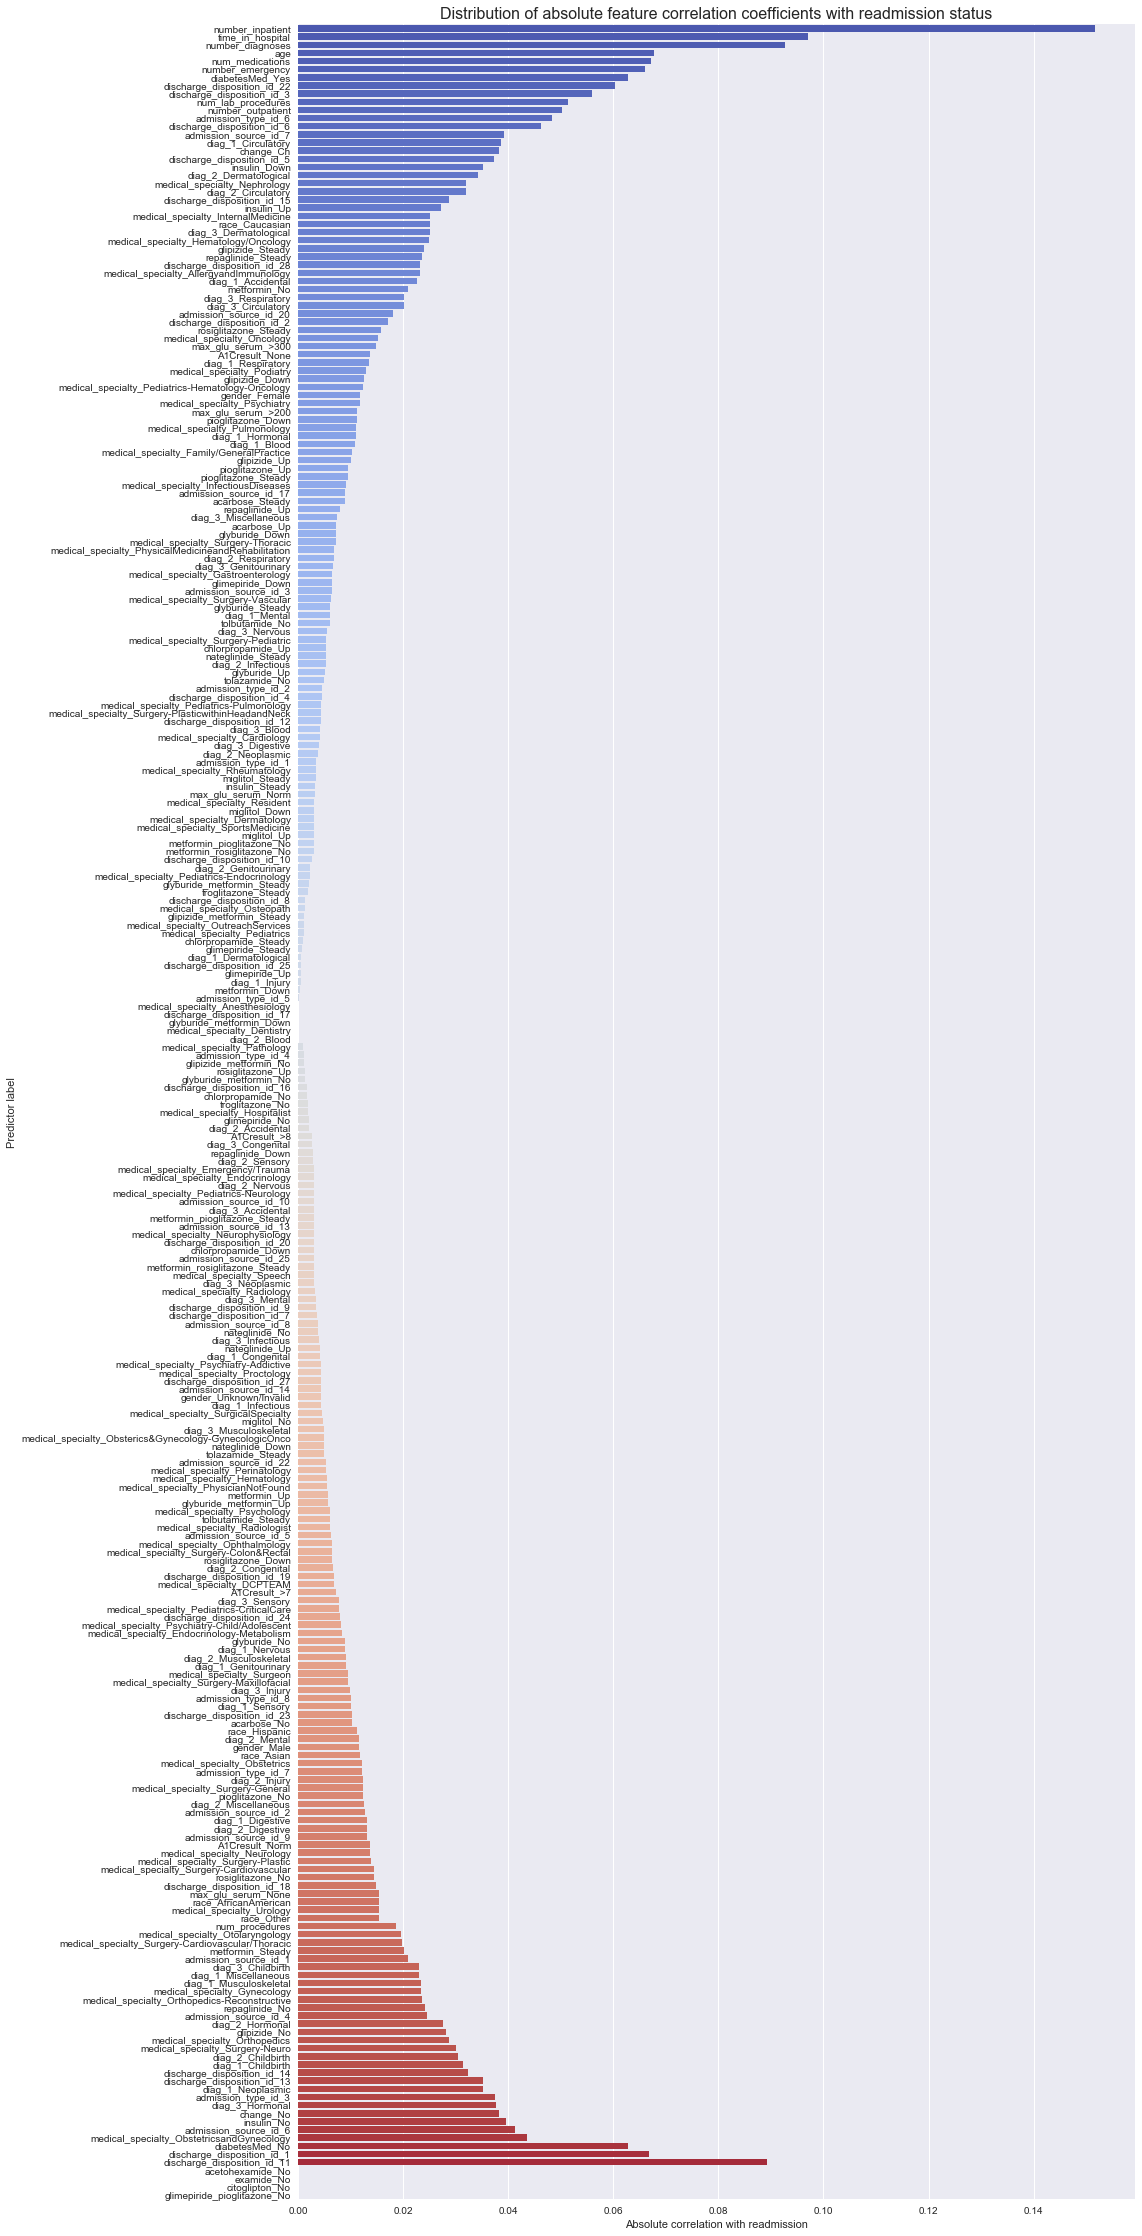

In [120]:
plt.figure(figsize=(15,40))
abs_corr_coef = abs(correlations_df.ix[correlations_df.columns.drop('readmitted'),'readmitted'].sort_values())
sns.barplot(abs_corr_coef, abs_corr_coef.index, orient='h', palette=sns.color_palette('coolwarm', len(abs_corr_coef)))
plt.ylabel('Predictor label'); plt.xlabel('Absolute correlation with readmission');
plt.title('Distribution of absolute feature correlation coefficients with readmission status', size=16);

It would be difficult to isolate factors that influence the reponse becauseas we can see the correlation coefficients are very small (p<0.1). This chart also made it immediately apparent which features would probably prove most useful in discriminating between response classes - age, number_inpatient, number_diagnoses, and the a patients' usage of diabetes medication.

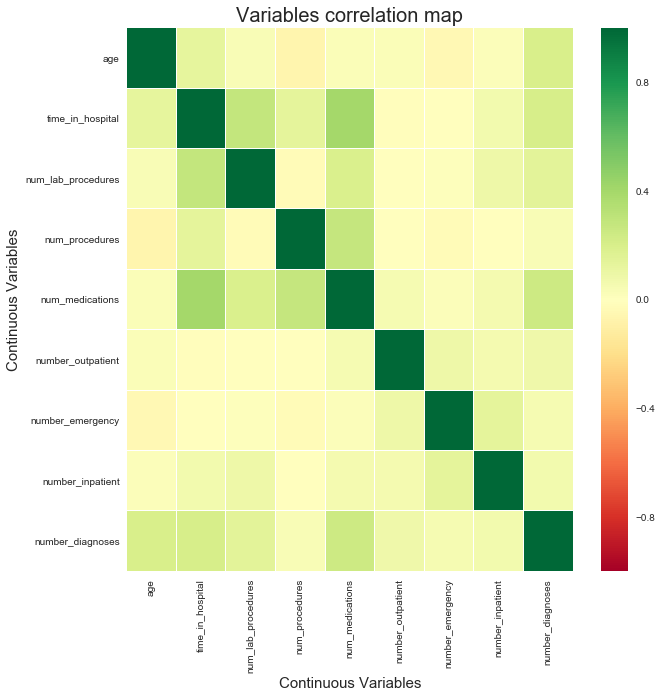

In [121]:
num_features_corr = Dataset['Large OHE'][num_features].corr()
sns.heatmap(num_features_corr,cmap='RdYlGn',linewidths=0.01,annot_kws={'size':10})
fig=plt.gcf()
plt.title("Variables correlation map", fontsize=20)
plt.xlabel('Continuous Variables', fontsize=15)
plt.ylabel('Continuous Variables', fontsize=15);
fig.set_size_inches(10,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The heatmap displays correlation between the continuous variables using darker colors to represent highly correlated variables and lighter colors for non-correlated variables.we can see there are some multicollinerilty  between features,these features are undesirable because they make estimates of a parametric model's coefficients less accurate. so we think that  that applying a dimensionality reduction technique is a good idea.



### Attribute Visualizion

Lets disucuss about some features that are strongly correlated with readmission.

readmitted = 0 -> readmitted within 30 days <br> 
readmitted = 1 -> readmitted in more than 30 days <br>
readmitted = 2 -> Not readmitted / no record of readmission<br>

#### Influence of number of inpatient encounters on readmission class:

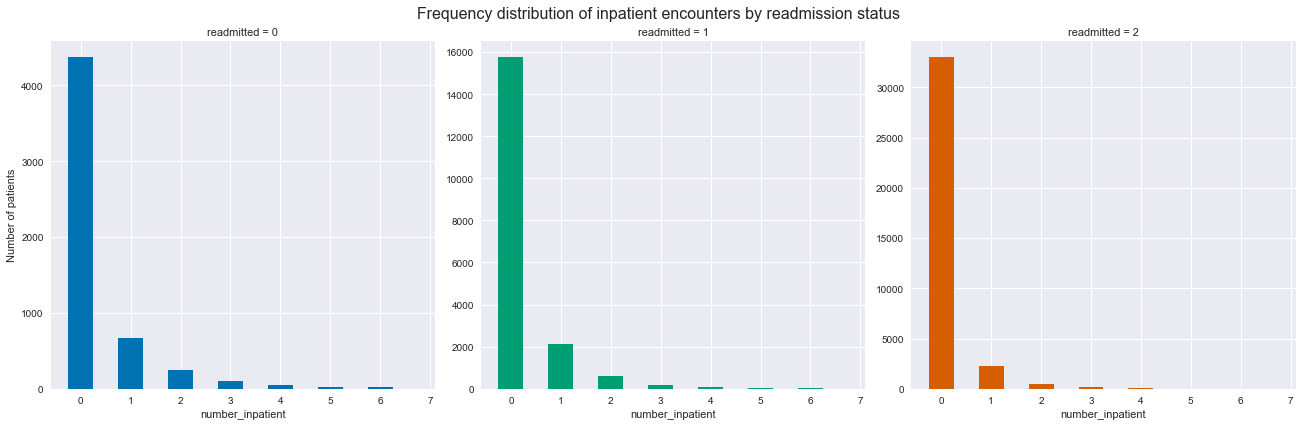

In [122]:
g = sns.FacetGrid(Dataset['Trimmed'], col="readmitted", subplot_kws={'alpha':1}, size=6,
                  sharey=False, palette='colorblind',hue='readmitted')  
g.map(sns.distplot, "number_inpatient", kde=False, hist_kws={'width':0.5, 'alpha':1, 'align':'mid'},
      bins=np.arange(-0.25,7.25,1));
g.axes[0][0].set_ylabel('Number of patients')
plt.suptitle('Frequency distribution of inpatient encounters by readmission status', size=16);
plt.subplots_adjust(top=0.9);

we can see from the chart,most patients typically hadn't visited previously as an inpatient, and very few patients had more than 4 or 5 visits in their record.However, that a greater proportion of patients that were readmitted had at least some history of readmission ie,all bars greater than 0 are more heavily populated in the readmitted = True chart than in its False counterpart.


#### Influence of length of visit on readmission
Let's see how patients of different readmission classes were distributed within time_in_hospital feature,which is the second-strongest correlation with readmission and was also strongly correlated with other features 


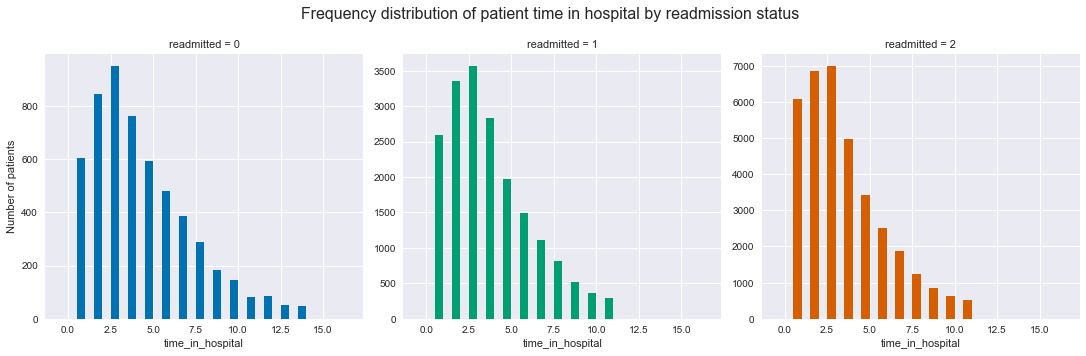

In [123]:
g = sns.FacetGrid(Dataset['Trimmed'], col="readmitted", subplot_kws={'alpha':1}, size=5, sharey=False, palette='colorblind',
                  hue='readmitted')  
g.map(sns.distplot, "time_in_hospital", kde=False, hist_kws={'width':0.5, 'alpha':1}, bins=np.arange(-0.5,17));
g.axes[0][0].set_ylabel('Number of patients')
plt.suptitle('Frequency distribution of patient time in hospital by readmission status', size=16);
plt.subplots_adjust(top=0.85);

The difference here is quite immediately clear - patients that were readmitted tended to spend longer in hospital. 

#### Influence of age on readmission status:

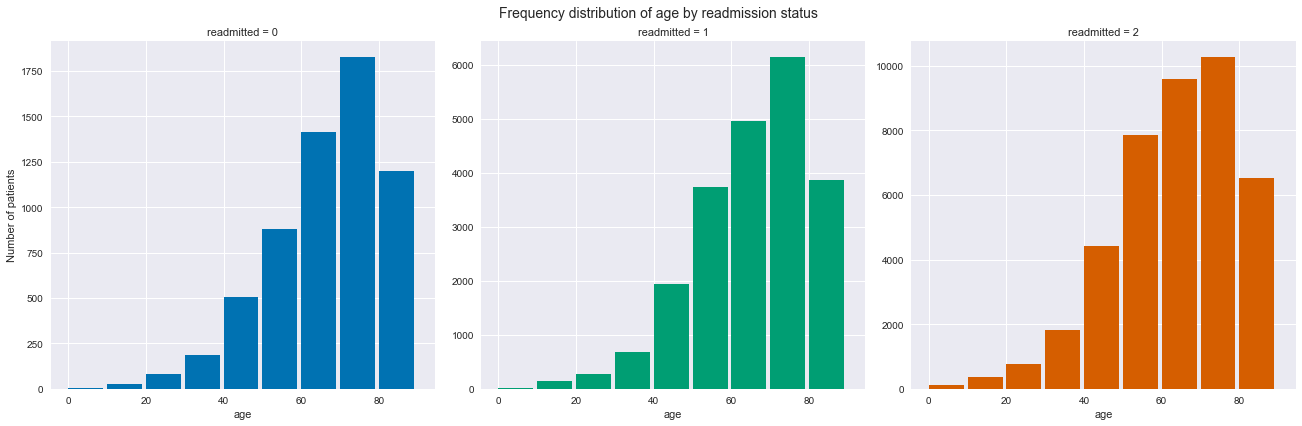

In [124]:
g = sns.FacetGrid(Dataset['Aggregated diagnoses'], col="readmitted", subplot_kws={'alpha':1}, size=6, sharey=False,
                  palette='colorblind',hue='readmitted')  
g.map(sns.distplot, "age", kde=False, hist_kws={'width':9, 'alpha':1}, bins=np.arange(0,100,10));
g.axes[0][0].set_ylabel('Number of patients')
plt.suptitle('Frequency distribution of age by readmission status', size=14);
plt.subplots_adjust(top=0.9);

The skewed distribution shows that a patient that has been readmitted was likely to be older than a patient that was not readmitted. This can also clearly calculated by the mean age of a patient in either class, as shown in the boxplot below.


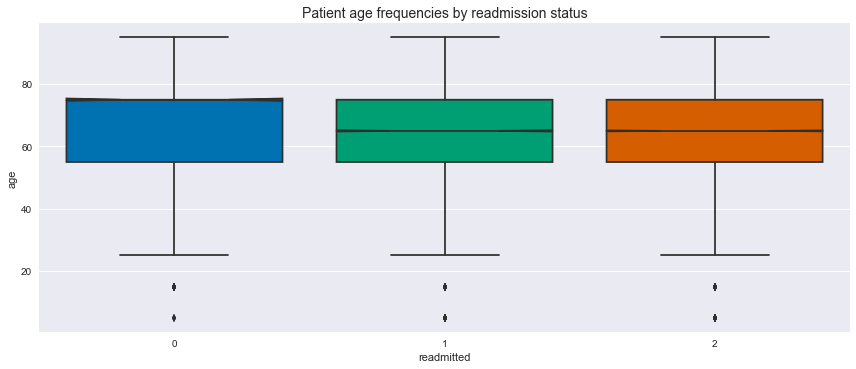

In [125]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='readmitted', y='age', data=Dataset['Encoded response'], palette='colorblind', notch=True, saturation=1)
plt.tight_layout()
plt.title('Patient age frequencies by readmission status', size=14);

we want to do our analysis based on the dataset in which >30 days and NO were merged, based on the fact that their centroids were slightly closer together than '>30 days' and '<30 days. we expect the patients that were readmitted in >30 days in a dataset spanning ten years to have little in common with 'severe' (<30 days) cases. However, number_inpatient, age, and time_in_hosptial were more similar between <30 days and >30 days than >30 days and NO. Overall, the 'distance' between the response class centroids were similar,this was why we chose to merge the responses according to the most significant features, rather than according to absolute distance.


In [126]:

from sklearn.preprocessing import scale
from scipy.spatial.distance import euclidean

# Response class centroid pairwise distances
Dataset['Scaled'] = pd.DataFrame(scale(Dataset['Large OHE']), index=Dataset['Large OHE'].index, columns=Dataset['Large OHE'].columns)

centroid_0 = Dataset['Scaled'].loc[Dataset['Large OHE'].readmitted == 0, :].mean()
centroid_1 = Dataset['Scaled'].loc[Dataset['Large OHE'].readmitted == 1, :].mean()
centroid_2 = Dataset['Scaled'].loc[Dataset['Large OHE'].readmitted == 2, :].mean();

euclidean(centroid_1, centroid_2) # '>30 days' and 'No' were slightly closer

1.704878525260768

From Explorarotory data analysis ,we can see '<30 days' and '>30 days' were closer for the most important features:

In [127]:
euclidean(centroid_0, centroid_1) 

1.7225849687568773

In [128]:
Dataset['Large supervised'] = Dataset['Large OHE'].copy() # Includes all features

In [129]:
# 3 different datasets to test classifier performances on
Dataset['Large supervised'] = Dataset['Large OHE'].copy() # Includes all features
Dataset['Filtered supervised'] = Dataset['Large OHE'].copy() # Will undergo filtering
Dataset['Dense supervised'] = Dataset['Trimmed'][np.concatenate((num_features, ['readmitted']), 0)] # Only includes num. features

In [130]:
# Create a binary response - readmitted = {True, False}, removed > 30 days
for prefix in ['Large', 'Filtered', 'Dense']:
    set_label = prefix + ' supervised'
    Dataset[set_label].loc[Dataset[set_label].readmitted == 0, 'readmitted'] = 1 # {0, 1} -> {1}
    Dataset[set_label].loc[Dataset[set_label].readmitted == 2, 'readmitted'] = 0 # {2} -> {0}


C:\Users\sabitri\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sabitri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sabitri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [131]:
# Split filtered data into predictors and response
X = Dataset['Filtered supervised'].loc[:, Dataset['Filtered supervised'].columns.drop('readmitted')]
y = Dataset['Filtered supervised'].loc[:, 'readmitted']

In [132]:
# One-hot encode predictors
ohe_features = pd.get_dummies(X[X.columns.drop(num_features)])
X = X[num_features].join(ohe_features)

In [133]:
# Split all datasets into training and testing subsets
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
Training = {}; Testing = {};

(Training['O_Filtered'], Testing['O_Filtered'],
Training['R_Filtered'], Testing['R_Filtered']) = train_test_split(X, y, random_state=0)

(Training['O_Large'], Testing['O_Large'],
 Training['R_Large'], Testing['R_Large'] ) = train_test_split(Dataset['Large supervised'].drop('readmitted',axis=1),
                                                                Dataset['Large supervised'].readmitted, random_state=0)

(Training['O_Dense'], Testing['O_Dense'],
 Training['R_Dense'], Testing['R_Dense'] ) = train_test_split(Dataset['Dense supervised'].drop('readmitted',axis=1),
                                                                Dataset['Dense supervised'].readmitted, random_state=0)

### Modeling and Evaluation

### Train and adjust parameters
####  Dimensionality reduction using PCA,LDA

As we know from correlation matrix that multicollinerity is exist on different variables in this dataset. Principal component analysis transforms the coordinate system so that all features are orthogonal and axes are ranked in order of how much variance they account for. principal component analysis is useful as a means of filtering out noise from the dataset as well. 

In [134]:
from sklearn import metrics
opt_metric = metrics.make_scorer(metrics.matthews_corrcoef) 

Scaling had to be performed on all datasets because it's an assumption of linear discriminant analysis, is necessary for PCA to produce a relevant result.

In [135]:
pca = PCA()
ss = StandardScaler()

for set_label in ['Large', 'Filtered', 'Dense']:
    obs_label = 'O_'+set_label
    Training[obs_label] = pd.DataFrame(ss.fit_transform(Training[obs_label]), index=Training[obs_label].index,
                                            columns=Training[obs_label].columns)
    Testing[obs_label] = pd.DataFrame(ss.fit_transform(Testing[obs_label]), index=Testing[obs_label].index,
                                         columns=Testing[obs_label].columns)

pc_labels = ['PC_'+str(i) for i in range(0,len(Training['O_Filtered'].columns))]
Training['O_Filtered'] = pd.DataFrame(pca.fit_transform(Training['O_Filtered']),
                                      index=Training['O_Filtered'].index, columns=pc_labels)
Testing['O_Filtered'] = pd.DataFrame(pca.transform(Testing['O_Filtered']), index=Testing['O_Filtered'].index,
                                     columns=pc_labels)

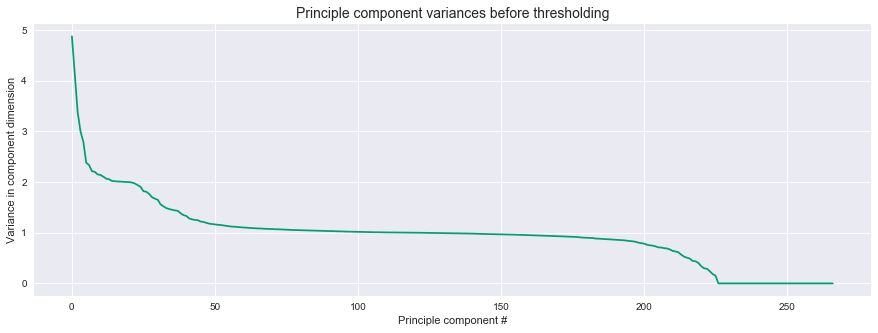

In [136]:
# Examine initial distribution of principal component variances
vt = VarianceThreshold()
vt.fit(Training['O_Filtered'])
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,len(Training['O_Filtered'].columns)),pd.Series(vt.variances_), color=sns.color_palette('colorblind')[1])
plt.xlabel('Principle component #'); plt.ylabel('Variance in component dimension');
plt.title('Principle component variances before thresholding', size=14);

By optimising a LDA classifier against datasets containing all PCs with at least a certain variance,we believe the noise component is removed.LDA chooses a direction that maximizes class separation, so, LDA classifier's Matthews correlation coefficient score would indicate how that direction is being computed.

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold
# Create a function to examine how a classifier's behaviour changes with the number of components
def optimise_variance_threshold(classifier, X, y, max_variance, increment, scoring_metric, min_variance=0):
    scores = []
    for current_threshold in np.arange(min_variance, max_variance, increment):
        vt_0 = VarianceThreshold(threshold=current_threshold)
        X_vt = pd.DataFrame(vt_0.fit_transform(X), index=X.index)
        variance_score = cross_val_score(classifier, X_vt, y, scoring=scoring_metric)
        scores.append(variance_score.mean())
    return scores

variance_mcc_scores = optimise_variance_threshold(LinearDiscriminantAnalysis(), Training['O_Filtered'],
                                                  Training['R_Filtered'], scoring_metric=opt_metric, max_variance=2,
                                                  increment=0.05, min_variance=0.01)

C:\Users\sabitri\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\sabitri\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\sabitri\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\sabitri\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\sabitri\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\sabitri\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\s

 The classifier is unaffected up until components with a variance greater than 0.6 are removed.This indicates the axis chosen according to linear discriminant analysis isn't being affected by the principal components with a variance less than about 0.6.So, we  thought it was reasonable to remove them.

In [141]:
# Remove noisy components
vt_0 = VarianceThreshold(threshold=0.6)
Training['O_Filtered'] = pd.DataFrame(vt_0.fit_transform(Training['O_Filtered']), index=Training['O_Filtered'].index)
Testing['O_Filtered'] = pd.DataFrame(vt_0.transform(Testing['O_Filtered']), index=Testing['O_Filtered'].index)

column_labels = ['PC_'+str(i) for i in range(0, len(Training['O_Filtered'].columns))]
Training['O_Filtered'].columns = column_labels
Testing['O_Filtered'].columns = column_labels

In [142]:
Training['O_Filtered'].shape

(45258, 213)

## K-means Clustering
K-means is an iterative algorithm which assigns data points to the nearest centroid 
and updates the centroids each pass until convergence or predetermined number of iterations is met.
sice our data set is very large with many attibutes we will be using PCA dimension reduction first and 
do recursive use of K-means clustering to split the dataset into different clusters.
K-means clustering can be used recursively to capture unevenly sized clusters and potentially endless endeavor,here we chose to focus on two activities:
Clustering on the entire dataset, with visualisations of the first two PCs.
Distilling high-dimensional forms in the data down into two dimensions using t-SNE, then seeing what readmission rates were like in different clusters.
So, Let's create  a dataset containing all observations.

In [143]:
Dataset['Unsupervised'] = pd.concat([Training['O_Filtered'].loc[:,:],
                                     Testing['O_Filtered'].loc[:,:]])

pc_50_labels = ['PC_'+str(j) for j in range(0, 51)]

# Some algorithms used demand alot of memory, so we'll need to use a smaller dataset for those
chosen_indices = np.random.choice(Dataset['Unsupervised'].index, 1000, replace=False)
Dataset['Unsupervised small'] = Dataset['Unsupervised'].ix[chosen_indices, pc_50_labels]

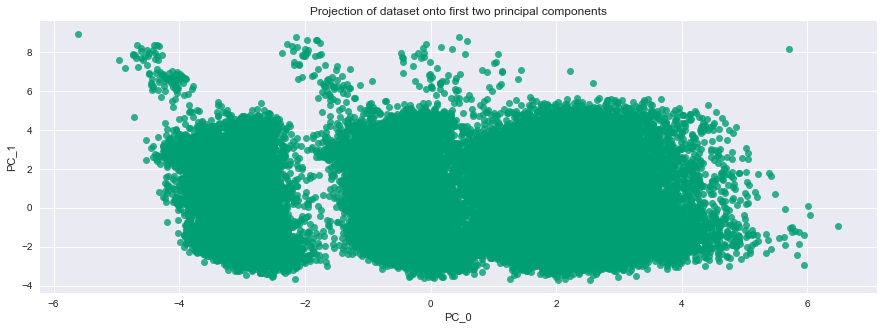

In [144]:
plt.figure(figsize=(15,5))
sns.regplot(x='PC_0', y='PC_1', data=Dataset['Unsupervised'], color=sns.color_palette('colorblind')[1], fit_reg=False);
plt.title('Projection of dataset onto first two principal components');

It looks like there are three primary clusters.

We used k-means clustering to split the dataset into the clusters identified above. We noted that k-means will tend to extract clusters of similar sizes, which meant that we had to perform the operation twice - once to split the dataset into the large leftward and coupled right clusters, then again to split the coupled clusters.

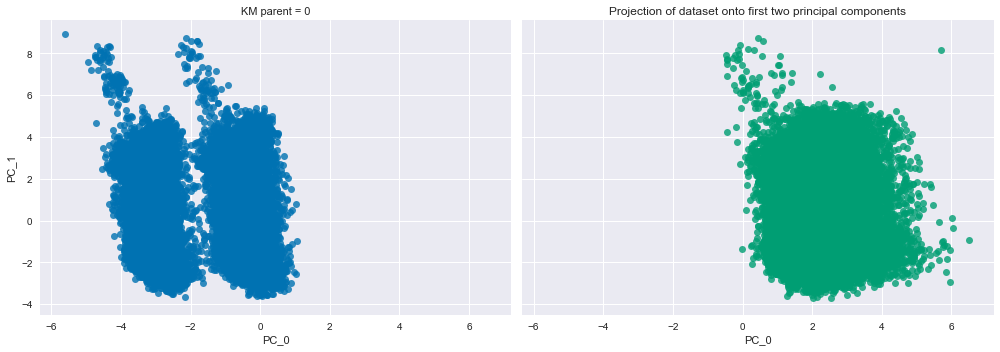

In [145]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib.colors import ListedColormap


KMClusterers = {} 
KMClusterers['Parent'] = KMeans(n_clusters=2, random_state=0, max_iter=300)

Clusters = {}
Clusters['KM parent'] = pd.Series(KMClusterers['Parent'].fit_predict(Dataset['Unsupervised']),
                              index=Dataset['Unsupervised'].index, name='KM parent')

sns.lmplot(x='PC_0', y='PC_1', col='KM parent', data=Dataset['Unsupervised'].join(Clusters['KM parent']), palette='colorblind',
           hue='KM parent', fit_reg=False, size=5, aspect=1.4);
plt.title('Projection of dataset onto first two principal components');


Next we took the two smaller clusters in the left-hand panel and repeat the clustering operation, making the differences between the two clusters irreconcilable.

In [146]:
Dataset['Unsupervised KM subset'] = Dataset['Unsupervised'].loc[Clusters['KM parent']==0, :]

In [147]:
KMClusterers['Child'] = KMeans(n_clusters=2, random_state=0, max_iter=300)
Clusters['KM child'] = pd.Series(KMClusterers['Child'].fit_predict(Dataset['Unsupervised KM subset']),
                                 index=Dataset['Unsupervised KM subset'].index, name='KM child');

All that remains is to combine the two sets of clusters and visualize the result.

#### K-means clustering visualization:

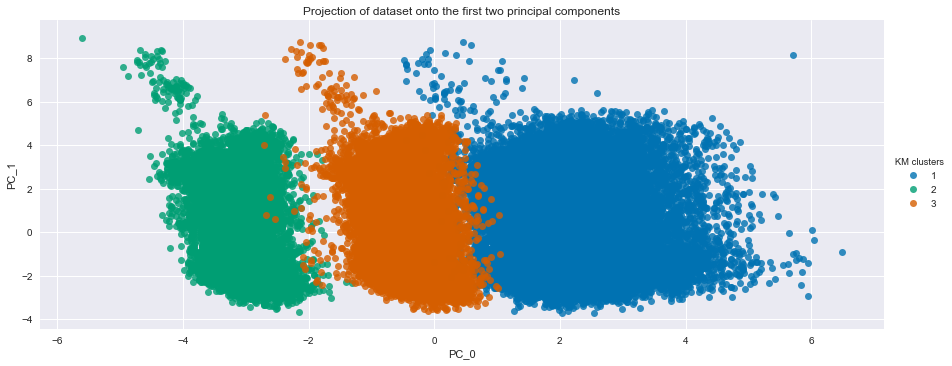

In [148]:
Clusters['KM'] = Clusters['KM child'] + 2 
Clusters['KM'] = pd.concat([Clusters['KM'],
               Clusters['KM parent'].loc[Clusters['KM parent'].index.drop(Clusters['KM child'].index)]],
               axis=0)
Clusters['KM'].name = 'KM clusters'

sns.lmplot(x='PC_0', y='PC_1', data=Dataset['Unsupervised'].join(Clusters['KM']),
           palette='colorblind', hue='KM clusters', fit_reg=False, size=5, aspect=2.5);
plt.title('Projection of dataset onto the first two principal components');

We ended up with three nicely partitioned clusters.

In [149]:
# Make datasets consisting of samples from each cluster
Dataset['KM 1'] = Dataset['Trimmed'].loc[Clusters['KM']==1, :]
Dataset['KM 2'] = Dataset['Trimmed'].loc[Clusters['KM']==2, :]
Dataset['KM 3'] = Dataset['Trimmed'].loc[Clusters['KM']==3, :]

In [150]:
# Create a dataframe containing the means of each feature for each of the above datasets
k1_mus = Dataset['KM 1'].describe().ix['mean',:]
k2_mus = Dataset['KM 2'].describe().ix['mean',:]
k3_mus = Dataset['KM 3'].describe().ix['mean',:]
kn_mus = pd.concat([k1_mus, k2_mus, k3_mus], axis=1)

In [151]:
kn_mus.columns = ['Cluster 1', 'Cluster 2', 'Cluster 3']

In [152]:
#Lets normalise the features
kn_mus = kn_mus.apply(func=(lambda row: row/(row.mean())), axis=1)

In [153]:
cblind = [sns.color_palette('colorblind')[0],sns.color_palette('colorblind')[1],sns.color_palette('colorblind')[2]]

In [154]:
kn_mus.apply(func=(lambda row: row/(row.mean())), axis=1) # Scaling the means to better represent cluster differences

,Cluster 1,Cluster 2,Cluster 3
age,0.986350,1.005507,1.008144
admission_type_id,0.994391,1.010118,0.995491
discharge_disposition_id,0.961746,1.075683,0.962571
admission_source_id,1.001827,0.999966,0.998207
time_in_hospital,1.074667,0.951387,0.973945
num_lab_procedures,1.032297,0.983117,0.984586
num_procedures,0.958633,1.046440,0.994926
num_medications,1.149239,0.870161,0.980600
number_outpatient,1.145165,0.833544,1.021290
number_emergency,1.233205,0.767615,0.999180


## DBSCAN clustering 
It is one of the most common density-based clustering algorithms:given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).
we use t-Distributed Stochastic Neighbor Embedding (t-SNE)technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets like ours into a dataset with a form in two dimensions.


In [155]:
#initialization 1
for p in np.arange(1, 101, 5):
    tsne = TSNE(n_components=2, perplexity=p, random_state=0, early_exaggeration=10, init='pca')
    Dataset['t-SNE p='+str(p)] = pd.DataFrame(tsne.fit_transform(Dataset['Unsupervised small']),
                                                 index = Dataset['Unsupervised small'].index,
                                                 columns=['Axis 0', 'Axis 1'])

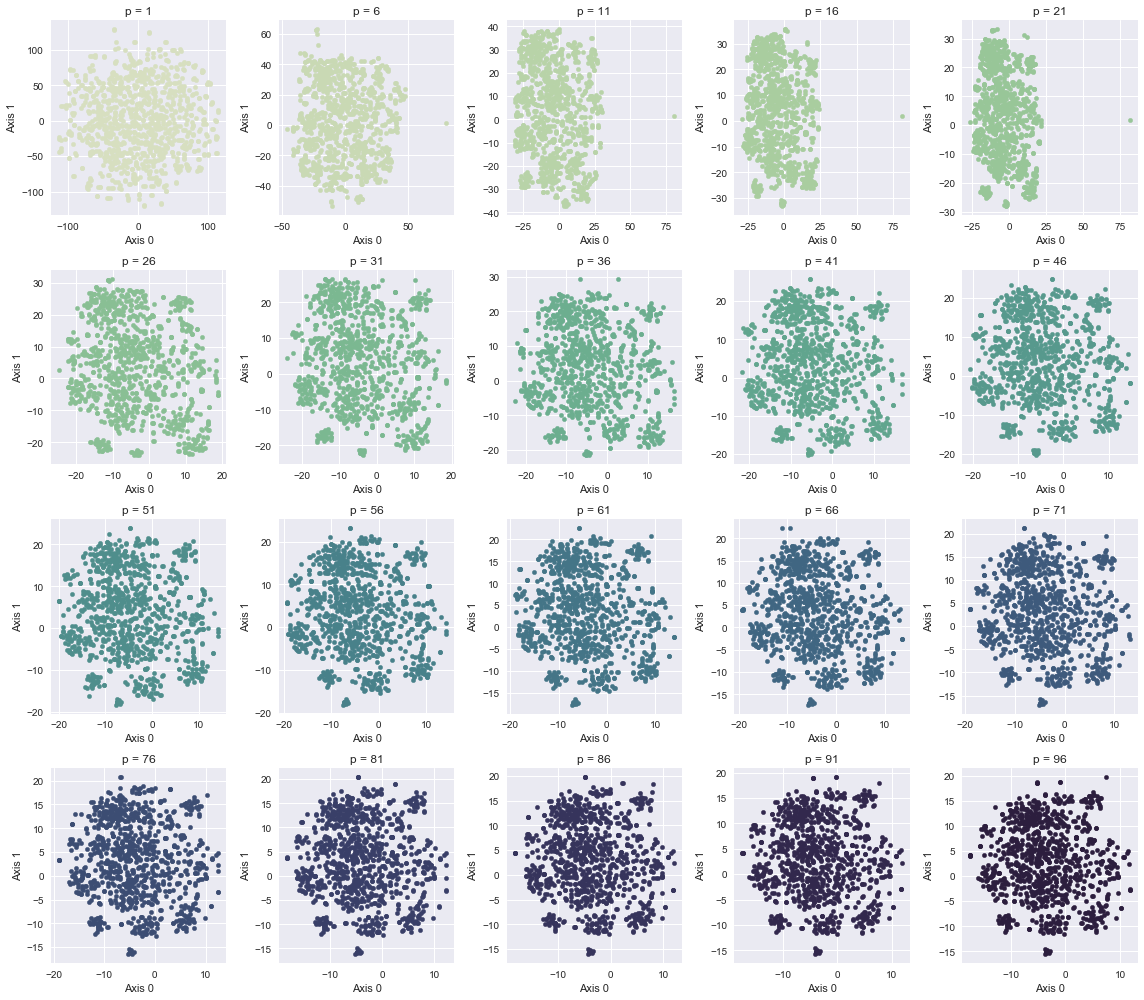

In [156]:
#initialization 2
f, ax = plt.subplots(4, 5, sharex=False, sharey=False, figsize=(16,14))
for i, k in enumerate(np.arange(1,101, 5)):
    j = int(i/5)
    i = i - (int(i/5)*5)
    Dataset['t-SNE p='+str(k)].plot(kind='scatter', x='Axis 0', y='Axis 1',
                                    ax=ax[j, i], color=sns.cubehelix_palette(20, start=.5, rot=-.75)[int(k/5)])
    ax[j,i].set_title('p = '+str(k))
    
plt.tight_layout()

Visually inspecting the data, a perplexity of about 56 brought out distinct clusters in the data, so we chose to use this value to proceed with clustering.

In [165]:
Dataset['t-SNE'] = Dataset['t-SNE p=56']

We chose to cluster the dataset using the DBSCAN algorithm, which doesn't require the number of clusters to be stipulated beforehand. To apply it effectively, we needed to make an informed choice of the eps hyperparameter.


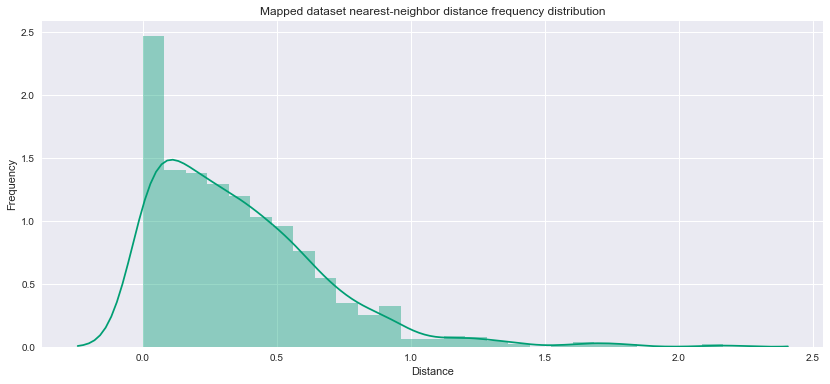

In [166]:
#distances distribution 
distances = pairwise_distances(Dataset['t-SNE'])
neighbor_distances = [np.min(row[np.nonzero(row)]) for row in distances]

plt.figure(figsize=(14, 6))
sns.distplot(neighbor_distances, color=sns.color_palette('colorblind')[1]);
plt.title('Mapped dataset nearest-neighbor distance frequency distribution');
plt.xlabel('Distance'); plt.ylabel('Frequency')

We wanted an eps value such that there were between 2 and 10 major clusters formed, which meant it was necessary that eps was big enough for relatively close points to be clustered, but not so big that visibly discrete clusters were merged.

In [167]:
nb_clusters = []
for eps_value in np.arange(0.1, 10, 0.01):
    db = DBSCAN(eps=eps_value, min_samples=20)
    Clusters['DB'] = pd.Series(db.fit_predict(Dataset['t-SNE']), index=Dataset['t-SNE'].index, name='DBSCAN clusters')
    nb_clusters.append(len(Clusters['DB'].unique()))

After iterating through several min_samples, we decided that classifying a core point on the basis of whether it had 10 points within a radius eps of it seemed reasonable; this was because it allowed the 'stable' regions of the graph to be discerned easily.

We can see from the graph that the number of clusters rises then falls with increasing eps. The small number of clusters to the left of the peak is explained by the fact that for a small eps, most points will be classified as outliers. To the right of the peak, a large eps value means that the majority of points are being classified as core points, implying that few clusters will be formed because most points are directly reachable from many other points. We were interested in clustering as many points as reasonably possible, so we chose to use a larger eps value that brough out 5 clusters - eps=2.5.

In [168]:
db = DBSCAN(eps=2.21, min_samples=20)
Clusters['DB'] = pd.Series(db.fit_predict(Dataset['t-SNE']), index=Dataset['t-SNE'].index, name='DBSCAN clusters')

In [169]:
Dataset['t-SNE with clusters'] = Dataset['t-SNE'].join(Clusters['DB'])

#### DBSCAN clustering visualization.

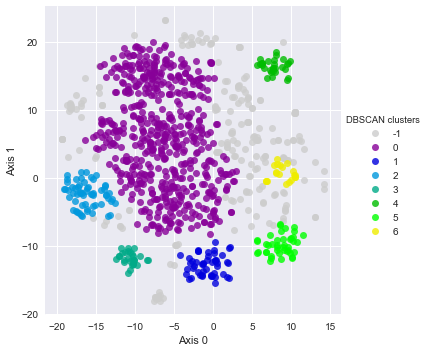

In [171]:
outlier_palette = [(0.8, 0.8, 0.8)];
outlier_palette = outlier_palette + sns.color_palette('spectral', n_colors=9)

sns.lmplot(data=Dataset['t-SNE with clusters'],
           x='Axis 0', y='Axis 1', hue='DBSCAN clusters', palette=outlier_palette,
          size=5, aspect=1, fit_reg=False);

In [170]:
def normalised_value_counts(series):
    return series.value_counts()/len(series)

cluster_counts_df = pd.DataFrame()
for cluster_nb in Clusters['DB'].unique():
    cluster_indices = (Clusters['DB'][Clusters['DB']==cluster_nb]).index
    cluster_counts = normalised_value_counts(Dataset['Encoded response'].loc[cluster_indices,'readmitted'])
    cluster_counts = cluster_counts.append(pd.Series(len(cluster_indices), index=['foo'], name='bar'))
    cluster_counts.name = 'Cluster '+str(cluster_nb)
    cluster_counts_df = pd.concat([cluster_counts_df, cluster_counts], axis=1)

priors = normalised_value_counts(Dataset['Encoded response'].loc[Clusters['DB'].index,'readmitted'])
priors.name = 'Priors'
cluster_counts_df = pd.concat([cluster_counts_df, priors], axis=1)
cluster_counts_df.index = ['No', '>30 days', '<30 days', 'Nb. points in cluster']
pd.set_option('max_columns',15)
round(cluster_counts_df,2)

C:\Users\sabitri\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,Cluster 5,Cluster 0,Cluster 1,Cluster -1,Cluster 2,Cluster 4,Cluster 3,Cluster 6,Priors
No,0.52,0.56,0.69,0.58,0.60,0.69,0.64,0.65,0.58
>30 days,0.48,0.36,0.20,0.33,0.27,0.31,0.29,0.20,0.34
<30 days,42.00,554.00,49.00,218.00,60.00,29.00,28.00,20.00,NaN
Nb. points in cluster,NaN,0.08,0.10,0.09,0.13,NaN,0.07,0.15,0.08


We can see that the patients of different readmission classes are not evenly distributed between the clusers, potentially providing a route to improved patient classification by feeding clusters into different classifiers.

### Summarize the Ramifications
From the above cluster analysis we  made made a few observations:<br>
Firsly,from the K-means clustering analysis table,we saw patients in the first cluster spent between a 3 and half a day more longer in hospital.Patients in the first cluster had about 5% more lab procedures than those in clusters two or three, and were, on average, using between 15 and 25% more medicaments.Patients in the first cluster had a record of more encounters(inpatient, emergency, and outpatient). <br>
we also think just by looking at this principle component's loadings it would be possible to identify what factors changed as we moved in its direction but obviously, the loadings would provide insight as to which categorical features are varying in the direction of PC_0.On the 2nd analysis,we did t-SNE visualisation of the dataset, followed by density-based clustering and saw that the patients of different readmission classes are not evenly distributed between the clusters.<br>

The most intresting finding of our analysis showed that the profile  of readmission differed significantly in patients where Hba1c was checked in the setting of a primary diabetes diagnosis, when compared to those with a primary circulatory disorder. While readmission rates remained the highest for patients with circulatory diagnoses,readmission rates for patients with diabetes appeared to be associated with the decision to test for HbA1c, rather than the values of the HbA1c result.So,the decision to obtain a measurement of HbA1c for patients with diabetes mellitus is a useful predictor of readmission rates which 
may prove valuable in the development of strategies to reduce readmission rates and costs for the care of individuals with diabetes mellitus.
 



## Deployment

Hemoglobin A1c (HbA1c) is an important measure of glucose control, which is widely applied to measure performance of diabetes care. The measurement of HbA1c at the time of hospital admission offers a unique opportunity to assess the efficacy of current therapy and to make changes in that therapy if indicated (e.g., HbA1c > 8.0% on current regimen). 

We considered four groups of encounters: (1) no HbA1c test performed, (2) HbA1c performed and in normal range, (3) HbA1c performed and the result is greater than 8% with no change in diabetic medications, and (4) HbA1c performed, result is greater than 8%, and diabetic medication was changed.

The statistical model suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the primary diagnosis. The data suggest further that the greater attention to diabetes reflected in HbA1c determination may improve patient outcomes and lower cost of inpatient care.

In conclusion, the decision to obtain a measurement of HbA1c for patients with diabetes mellitus is a useful predictor of readmission rates which may prove valuable in the development of strategies to reduce readmission rates and costs for the care of individuals with diabetes mellitus. The profile of readmission differed significantly in patients where Hba1c was checked in the setting of a primary diabetes diagnosis, when compared to those with a primary circulatory disorder. While readmission rates remained the highest for patients with circulatory diagnoses, readmission rates for patients with diabetes appeared to be associated with the decision to test for HbA1c, rather than the values of the HbA1c result.

## Exceptional Work
We hope that our Principal Components Analysis and our Linear Discriminate Analysis will qualify as Exceptional Work.  We spent many hours processing data and researching the methods employed.

For exceptional work we could have focus of analysis by choosing to study only patients with diabetes mellitus for example, or only looking at a particular demographic, or investigating the influence of one factor on readmission rates but due to lack of time,we decided to to check which diagnosis was most common among the patients and to see how diagnosis frequencies differed between the clusters in K-means clustering algorithm.

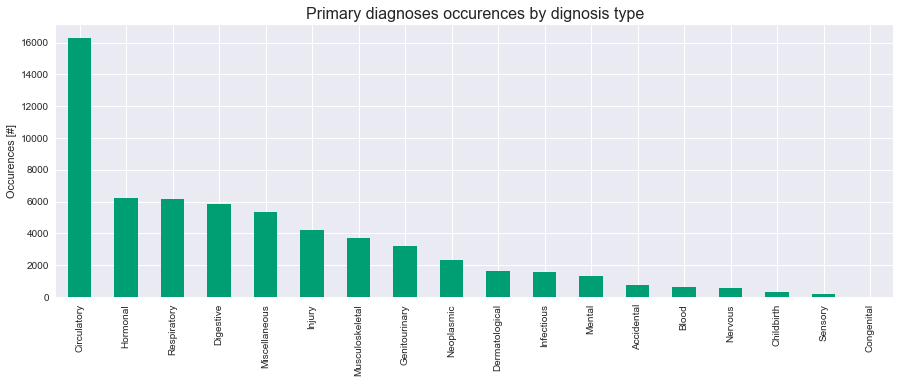

In [163]:
plt.figure(figsize=(15,5))
Dataset['Trimmed'].diag_1.value_counts().plot(color=sns.color_palette('colorblind')[1], kind='bar', rot=90);
plt.title('Primary diagnoses occurences by dignosis type', size=16);
plt.ylabel('Occurences [#]');

This is the possibility that this barplot  above is representative of the diagnosis frequency for all patients in these hospitals between 1998 and 2008 but  this dataset was built out of records for which some form of diabetes was entered as a diagnosis, it seems reasonable that these would be among the most common primary diagnoses.We can see that circulatory diseases have a substantial lead on diagnosis type as we know cardiovascular disease and kidney disease are more prevalent among diabetics patients.

Lets continue from the K-means clustering analysis above and remembered the analysis was that patients in cluster 1 tended to use medications, patients in cluster 2 tended not to, and patients in cluster 3 tended to somewhere inbetween. With this in mind,  we thought it would be interesting to see how diagnosis frequencies differed between the clusters.

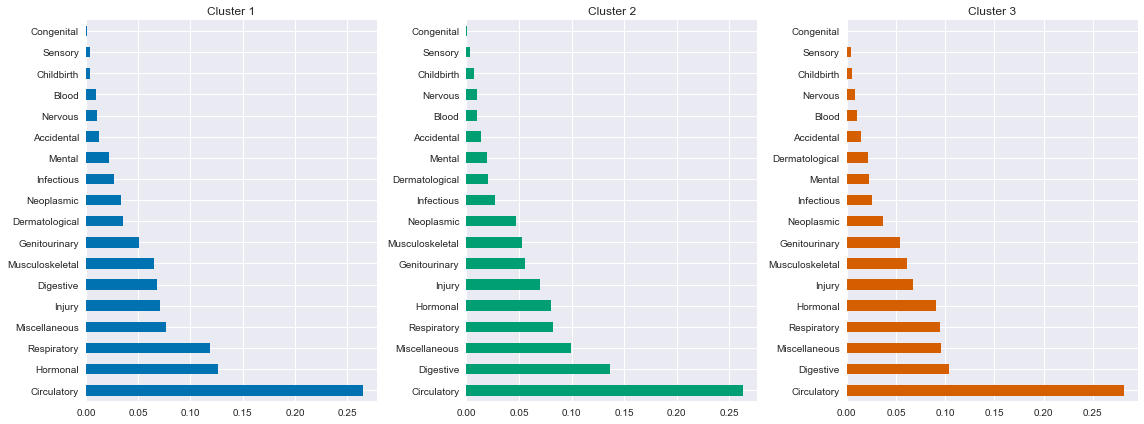

In [164]:
def normalised_value_counts(series):
    return series.value_counts()/len(series)

f, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(16,6))
N_bars = np.arange(len(Dataset['KM 1'].diag_1.unique()))*2
for i in range(0,3):
    normalised_value_counts(Dataset['KM '+str(i+1)].diag_1).plot(kind='barh', ax=ax[i],
                                                                 color=sns.color_palette('colorblind')[i])
    ax[i].set_title('Cluster '+str(i+1))
    
plt.tight_layout()

we can see from above plot that all clusters had circulatory diagnoses on the top.Patients on fewer/no diabetes medications were readmitted much more frequently for digestive problems, whereas patients with many were admitted more frequently for hormonal problems as well.

### References
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008
https://pandas.pydata.org/pandas-docs/stable/cookbook.html
http://scikit-learn.org/stable/modules/clustering.html
https://github.com/eclarson/DataMiningNotebooks/blob/master/09.%20Clustering%20and%20Discretization.ipynb


 




